In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


BACK END SYSTEM DETAILS

In [ ]:
import platform

# Display system details
print("System Details:")
print(f"System: {platform.system()}")
print(f"Node: {platform.node()}")
print(f"Release: {platform.release()}")
print(f"Version: {platform.version()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")

System Details:
System: Linux
Node: 20687236e7fa
Release: 6.1.58+
Version: #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
Machine: x86_64
Processor: x86_64


IMPORT REQUIRED LIBRAIES

In [ ]:
import sys
import os
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 300
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import *

print(f'Tensorflow Version: {tf.__version__}.')


Tensorflow Version: 2.15.0.


SETTING UP ENVIRONMENT

In [ ]:
import os
import tensorflow as tf

gpu_device_location = tpu_device_location = cpu_device_location = None

if os.environ.get('COLAB_GPU', '') == '1':
    print("Allocated GPU Runtime Details:")
    !nvidia-smi
    print()

    gpu_device_name = None  # Define the variable outside the try block

    try:
        import pynvml
        pynvml.nvmlInit()
        handle = pynvml.nvmlDeviceGetHandleByIndex(0)
        gpu_device_name = pynvml.nvmlDeviceGetName(handle)

        if gpu_device_name not in {b'Tesla T4', b'Tesla P4', b'Tesla P100-PCIE-16GB'}:
            raise Exception("Unfortunately, this instance does not have a T4, P4, or P100 GPU.\nSometimes Colab allocates a Tesla K80 instead of a T4, P4, or P100.\nIf you get Tesla K80 then you can factory reset your runtime to get another GPU.")
    except Exception as hardware_exception:
        print(hardware_exception, end='\n\n')

    gpu_device_location = tf.test.gpu_device_name()
    if gpu_device_name is not None:  # Check if gpu_device_name is defined before printing
        print(f"{gpu_device_name.decode('utf-8')} is allocated successfully at location: {gpu_device_location}")
elif 'COLAB_TPU_ADDR' in os.environ:
    tpu_device_location = f"grpc://{os.environ['COLAB_TPU_ADDR']}"
    print(f"TPU is allocated successfully at location: {tpu_device_location}.")
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_location)
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    tpu_strategy = tf.distribute.TPUStrategy()
else:
    cpu_device_location = "/cpu:0"
    print("GPUs and TPUs are not allocated successfully, hence runtime fallback to CPU.")

Allocated GPU Runtime Details:
Sun Mar 10 04:13:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+------------------------------------

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


BASH CODE FOR TREE UTILITY

In [ ]:
%%bash
RED_COLOR='\033[0;31m'
NO_COLOR='\033[0m'
pkg_name=tree
dpkg -s $pkg_name &> /dev/null
if [ "$?" -ne "0" ]
    then
        echo "Installing tree utility..."
        apt-get autoclean
        apt-get autoremove
        apt-get install $pkg_name
        if [ "$?" -eq "0" ]
            then
                echo -e ${RED_COLOR}"tree utility installed sucessfully.\n"${NO_COLOR}
        fi
    else
        echo "tree utility is already installed."
fi
tree --version

Installing tree utility...
Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (173 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
tree utility installed sucessfully.

tree v2.0.2

DISPLAY OF FILE STRUCTURE

In [ ]:
!tree -d -C "drive/MyDrive/Deep_Learning_Course_Project"

drive/MyDrive/Deep_Learning_Course_Project
└── Brain-Tumor-Dataset
    ├── Brain-Tumor-Images-Mat-Files
    ├── prediction
    ├── Testing
    │   ├── glioma
    │   ├── meningioma
    │   ├── no_tumor
    │   └── pituitary_tumor
    ├── Training
    │   ├── glioma
    │   ├── meningioma
    │   ├── no_tumor
    │   └── pituitary_tumor
    └── Tumor-Mask
        ├── glioma
        ├── meningioma
        └── pituitary_tumor

17 directories


SETTING UP ROOTS AND DATA DIRECTORIES

In [ ]:
ROOT_DIR = r"drive/MyDrive/Deep_Learning_Course_Project/"
DATA_ROOT_DIR = os.path.join(ROOT_DIR, "Brain-Tumor-Dataset")
TRAIN_DIR = os.path.join(DATA_ROOT_DIR, 'Training')
MASK_DIR = os.path.join(DATA_ROOT_DIR, 'Tumor-Mask')
assert os.path.isdir(ROOT_DIR) and os.path.isdir(DATA_ROOT_DIR) and os.path.isdir(TRAIN_DIR) and os.path.isdir(MASK_DIR)
TUMOR_CLASS = ['meningioma', 'glioma', 'pituitary_tumor', 'no_tumor']
IMAGE_DATA_PATHS = [os.path.join(TRAIN_DIR, tumor_class) for tumor_class in TUMOR_CLASS]
MASK_DATA_PATHS = [os.path.join(MASK_DIR, tumor_name) for tumor_name in TUMOR_CLASS[:-1]]

DATA PREPROCESSING AND DATA ANAYSIS

In [ ]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in IMAGE_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],
                                    index = TUMOR_CLASS)
data_distribution_count

meningioma          708
glioma             1428
pituitary_tumor     935
no_tumor            395
dtype: int64

DATA DISTRIBUTION VISUALIZATION

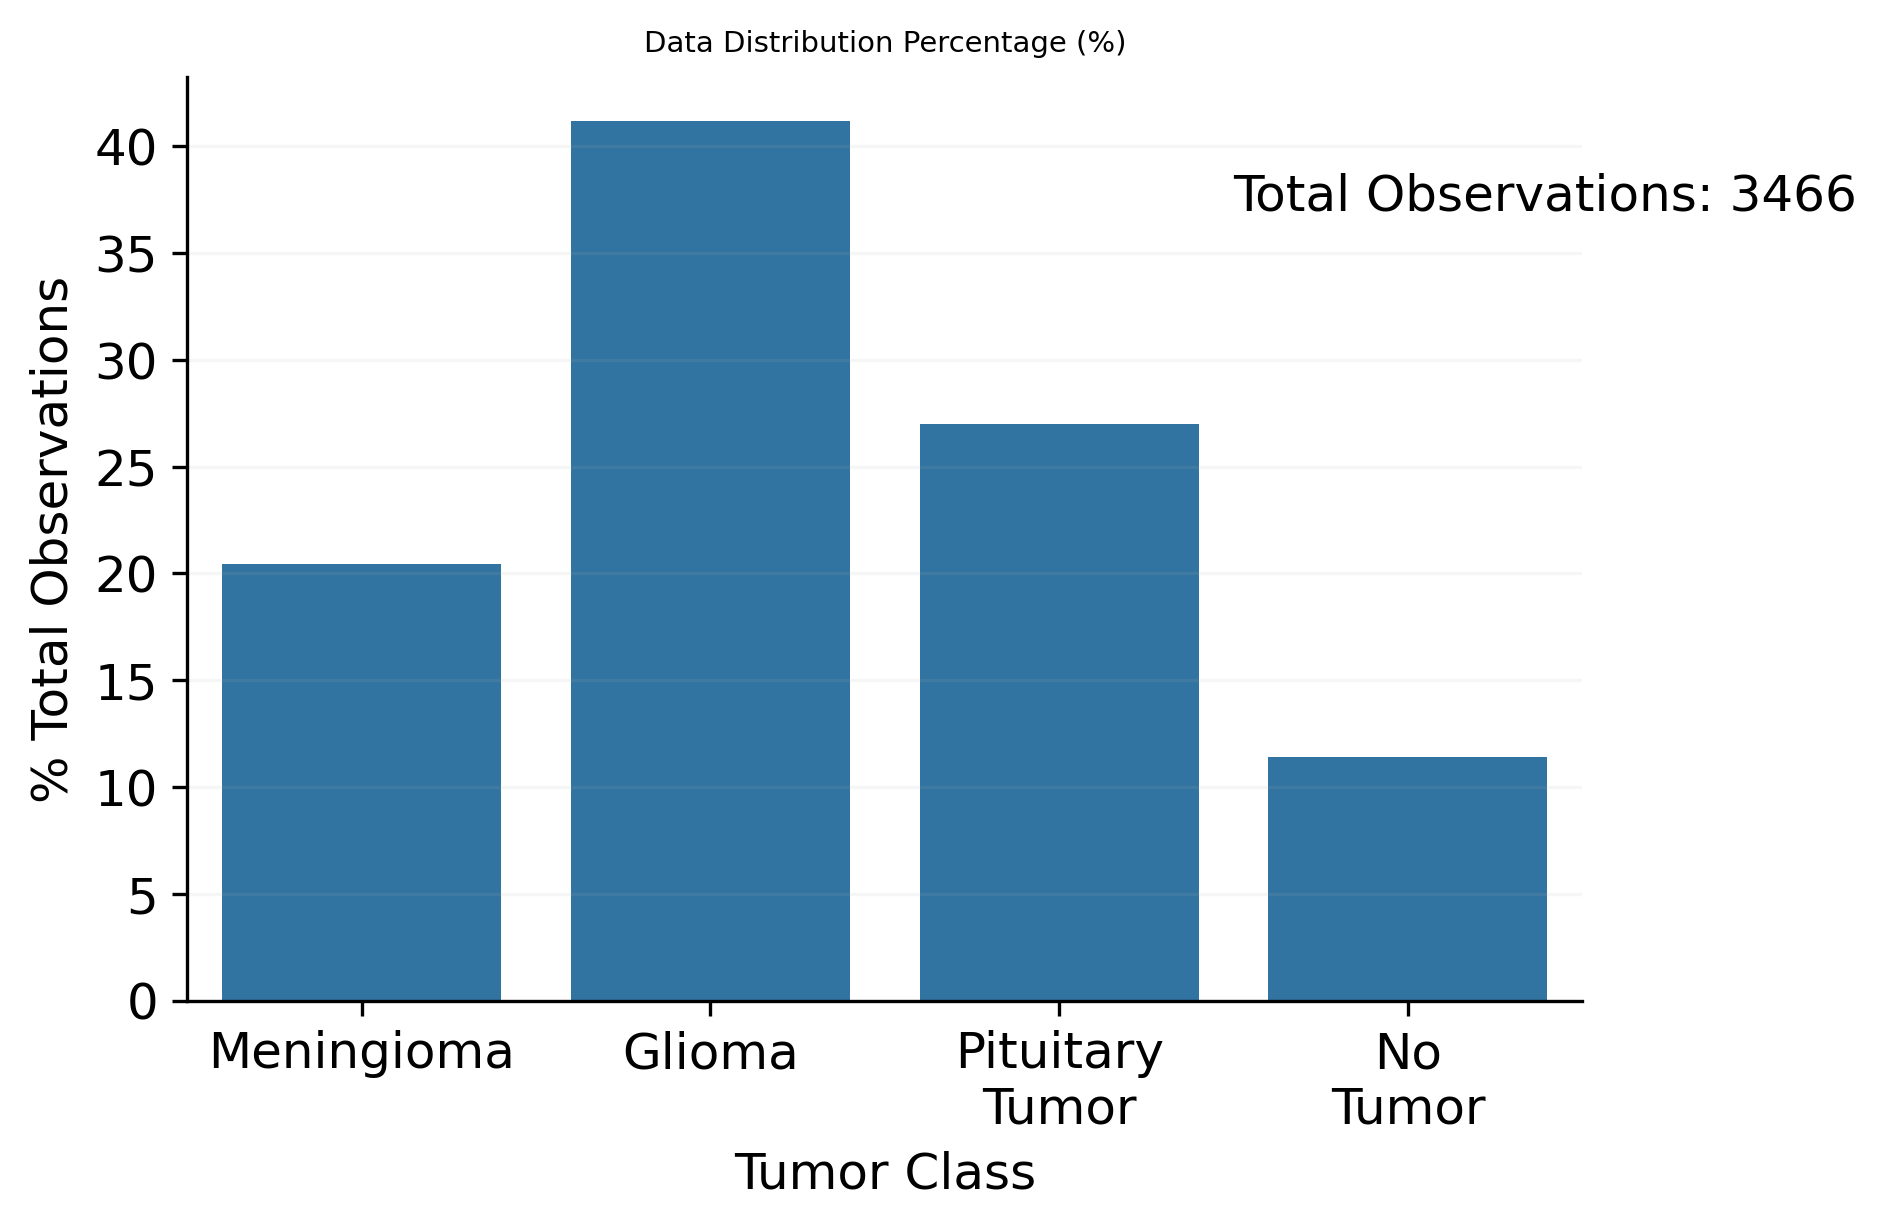

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, axis = plt.subplots(figsize=(6, 4))

# Add grid lines
axis.grid(True, alpha=0.1)

# Set title
axis.set_title("Data Distribution Percentage (%)", fontsize=7)

# Create a bar plot
sns.barplot(
    x=['\n'.join(curr_index.strip().split('_')).title() for curr_index in data_distribution_count.index],
    y=100 * (data_distribution_count / data_distribution_count.sum()),
    ax=axis
)

# Set labels and tick parameters
axis.set_xlabel("Tumor Class", fontsize=12)
axis.set_ylabel("% Total Observations", fontsize=12)
axis.tick_params(which='major', labelsize=12)

# Add text indicating the total observations
axis.text(2.5, 37, f'Total Observations: {data_distribution_count.sum()}', fontdict=dict(size=12))

# Remove spines (the borders of the plot)
sns.despine()

# Show the plot
plt.show()


VISULAIZATION OF BRAIN MRI DATASET

In [ ]:
BRIGHTNESS_FACTOR = 1.7
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes = axes.flatten()
fig.suptitle("Brain Tumor MRI Images (T2w)", fontsize=16, fontdict=dict(weight='bold'), y=1.04)
for curr_title, filename, curr_axis in zip(TUMOR_CLASS[:-1], IMAGE_DATA_PATHS[:-1], axes[:3]):
    curr_image = Image.open(os.path.join(filename, os.listdir(filename)[2]))
    img_enhancer = ImageEnhance.Brightness(curr_image)
    curr_axis.imshow(img_enhancer.enhance(BRIGHTNESS_FACTOR))
    curr_axis.set_title(" ".join(curr_title.split('_')).title(), fontsize=14)

for filename, curr_axis in zip(MASK_DATA_PATHS, axes[3:]):
    curr_image = Image.open(os.path.join(filename, os.listdir(filename)[2]))
    mask_enhancer = ImageEnhance.Brightness(curr_image)
    curr_axis.imshow(mask_enhancer.enhance(BRIGHTNESS_FACTOR))

# Remove ticks and spines
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig.tight_layout()
sns.despine()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

DEVELOPMENT OF TRAINING,VALIDATION AND TESTING

In [ ]:
image_data_paths = []
for curr_path, tumor_name in zip(IMAGE_DATA_PATHS, TUMOR_CLASS):
    if os.path.exists(curr_path) and os.path.isdir(curr_path):
        image_data_paths.extend(map(lambda filename: (os.path.join(curr_path, filename), tumor_name), os.listdir(curr_path)))

In [ ]:
image_data_paths_df = pd.DataFrame(image_data_paths, columns = ['image_filepaths', 'tumor_class']).sample(frac = 1, random_state = 42).reset_index(drop = True)
image_data_paths_df.head()

,image_filepaths,tumor_class
0,drive/MyDrive/Deep_Learning_Course_Project/Bra...,pituitary_tumor
1,drive/MyDrive/Deep_Learning_Course_Project/Bra...,meningioma
2,drive/MyDrive/Deep_Learning_Course_Project/Bra...,no_tumor
3,drive/MyDrive/Deep_Learning_Course_Project/Bra...,no_tumor
4,drive/MyDrive/Deep_Learning_Course_Project/Bra...,glioma


In [ ]:
image_data_paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_filepaths  3466 non-null   object
 1   tumor_class      3466 non-null   object
dtypes: object(2)
memory usage: 54.3+ KB


In [ ]:
intermediate_train_data, test_data = train_test_split(image_data_paths_df,
                                                      train_size = 0.70,
                                                      random_state = 42,
                                                      stratify = image_data_paths_df.tumor_class)

train_data, validation_data = train_test_split(intermediate_train_data,
                                               train_size = 0.80,
                                               random_state = 42,
                                               stratify = intermediate_train_data.tumor_class)

TRAINING AND TESTING DATASET DATA DISTRIBUTION VISULAIZATION

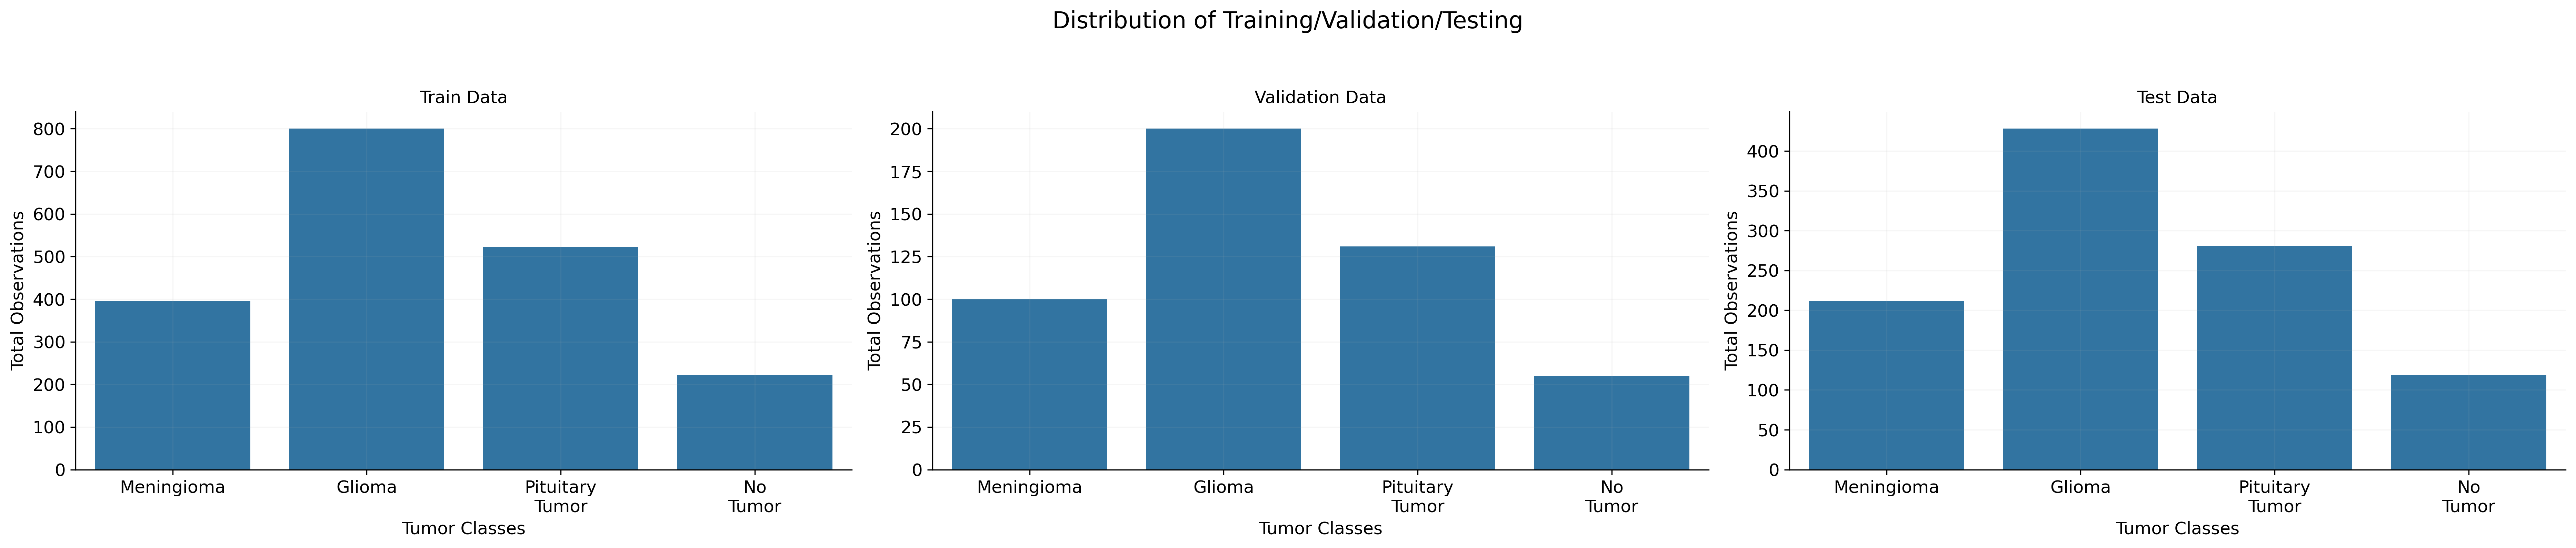

In [ ]:
# Splitting the intermediate_train_data into training and validation datasets
train_data, validation_data = train_test_split(intermediate_train_data,
                                               train_size=0.80,
                                               random_state=42,
                                               stratify=intermediate_train_data.tumor_class)

# Create subplots
fig, axes = plt.subplots(ncols=3, figsize=(25, 5))
fig.suptitle("Distribution of Training/Validation/Testing", fontsize=16, fontdict=dict(weight='bold'), y=1.05)

# Countplot for Train Data
sns.countplot(x=train_data.tumor_class, order=TUMOR_CLASS, ax=axes[0])
axes[0].grid(alpha=0.1)
axes[0].set_title('Train Data', fontsize=12)
axes[0].set_xlabel("Tumor Classes", fontsize=12)
axes[0].set_ylabel("Total Observations", fontsize=12)
axes[0].tick_params(which='major', labelsize=12)
axes[0].set_xticks(range(len(TUMOR_CLASS)))
axes[0].set_xticklabels(["\n".join(xtick.split("_")).title() for xtick in TUMOR_CLASS])

# Countplot for Validation Data
sns.countplot(x=validation_data.tumor_class, order=TUMOR_CLASS, ax=axes[1])
axes[1].grid(alpha=0.1)
axes[1].set_title('Validation Data', fontsize=12)
axes[1].set_xlabel("Tumor Classes", fontsize=12)
axes[1].set_ylabel("Total Observations", fontsize=12)
axes[1].tick_params(which='major', labelsize=12)
axes[1].set_xticks(range(len(TUMOR_CLASS)))
axes[1].set_xticklabels(["\n".join(xtick.split("_")).title() for xtick in TUMOR_CLASS])

# Countplot for Test Data
sns.countplot(x=test_data.tumor_class, order=TUMOR_CLASS, ax=axes[2])
axes[2].grid(alpha=0.1)
axes[2].set_title('Test Data', fontsize=12)
axes[2].set_xlabel("Tumor Classes", fontsize=12)
axes[2].set_ylabel("Total Observations", fontsize=12)
axes[2].tick_params(which='major', labelsize=12)
axes[2].set_xticks(range(len(TUMOR_CLASS)))
axes[2].set_xticklabels(["\n".join(xtick.split("_")).title() for xtick in TUMOR_CLASS])

sns.despine()
plt.tight_layout()
plt.show()



DATA/IMAGE AUGUMENTATION


Image augmentation is usually used to increase the image dataset and also to make the network more robust against translation invariance. Image augmentation is defined as creating duplicates of the original image datasets by flipping, rotating, zooming, and adjusting brightness.

We will use data/image augmentation using ImageDataGenerator class to train the model on different types of combinations formed by rotation, flipping, changing the brightness etc of an image so as to increase our model accuracy.



In [ ]:
image_size = 128
batch_size = 32

image_datagen_kwargs = dict(rescale = 1 / 255,
                            rotation_range = 15,
                            width_shift_range = 0.1,
                            zoom_range = 0.01,
                            shear_range = 0.01,
                            brightness_range = [0.3, 1.5],
                            horizontal_flip = True,
                            vertical_flip = True)


In [ ]:
train_image_datagen = ImageDataGenerator(**image_datagen_kwargs)
validation_image_datagen = ImageDataGenerator(**image_datagen_kwargs)
test_image_datagen = ImageDataGenerator(**image_datagen_kwargs)

In [ ]:
train_dataset = train_image_datagen.flow_from_dataframe(train_data,
                                                        x_col = 'image_filepaths',
                                                        y_col = 'tumor_class',
                                                        seed = 42,
                                                        batch_size = batch_size,
                                                        target_size = (image_size, image_size),
                                                        color_mode = 'rgb')
validation_dataset = validation_image_datagen.flow_from_dataframe(validation_data,
                                                                  x_col = 'image_filepaths',
                                                                  y_col = 'tumor_class',
                                                                  seed = 42,
                                                                  batch_size = batch_size,
                                                                  target_size = (image_size, image_size),
                                                                  color_mode = 'rgb')
test_dataset = test_image_datagen.flow_from_dataframe(test_data,
                                                      x_col = 'image_filepaths',
                                                      y_col = 'tumor_class',
                                                      seed = 42,
                                                      batch_size = batch_size,
                                                      target_size = (image_size, image_size),
                                                      color_mode = 'rgb')

Found 1940 validated image filenames belonging to 4 classes.
Found 486 validated image filenames belonging to 4 classes.
Found 1040 validated image filenames belonging to 4 classes.


In [ ]:
print("Information about Training Dataset:")
print(train_dataset.class_indices)
print(train_dataset.image_shape, end = '\n\n')

print("Information about Validation Dataset:")
print(validation_dataset.class_indices)
print(validation_dataset.image_shape, end = '\n\n')

print("Information about Testing Dataset:")
print(test_dataset.class_indices)
print(test_dataset.image_shape)

Information about Training Dataset:
{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
(128, 128, 3)

Information about Validation Dataset:
{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
(128, 128, 3)

Information about Testing Dataset:
{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
(128, 128, 3)


TRAINING,VALIDATION AND TESTING DATA IMAGES GLIMPSE

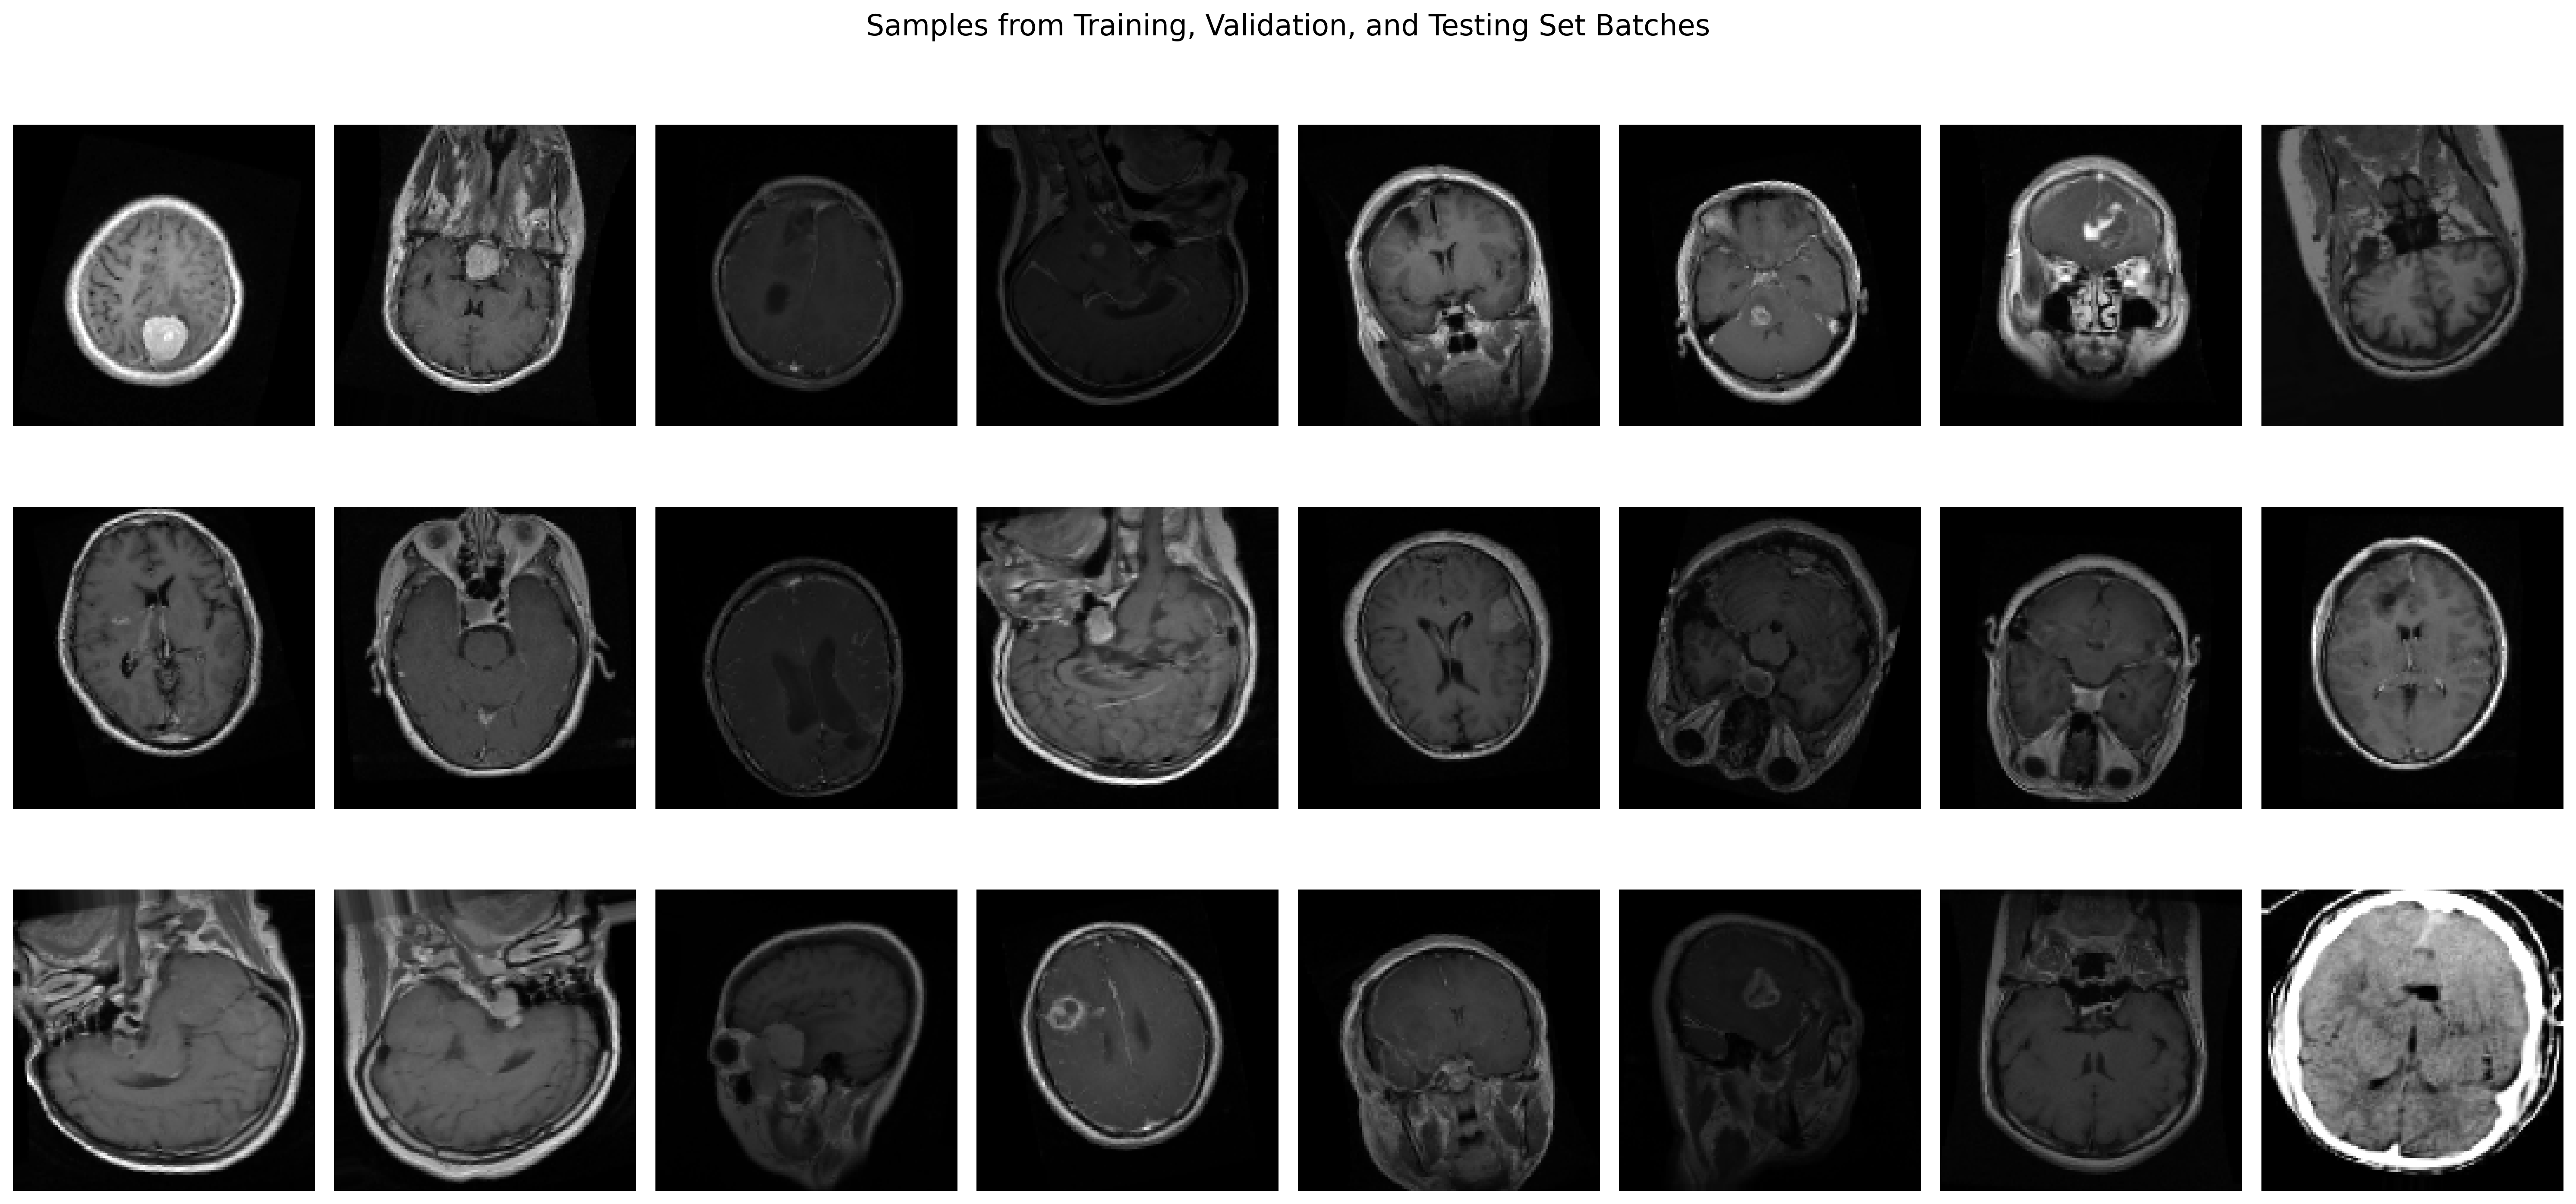

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(20, 10))
fig.suptitle("Samples from Training, Validation, and Testing Set Batches", fontsize=16, fontdict=dict(weight='bold'))

# Plot samples from the training dataset
for curr_axis, curr_image in zip(axes[0, :], train_dataset[0][0][:8]):
    curr_axis.imshow(tf.squeeze(curr_image), cmap='gray')
    curr_axis.axis(False)

# Plot samples from the validation dataset
for curr_axis, curr_image in zip(axes[1, :], validation_dataset[0][0][:8]):
    curr_axis.imshow(tf.squeeze(curr_image), cmap='gray')
    curr_axis.axis(False)

# Plot samples from the testing dataset
for curr_axis, curr_image in zip(axes[2, :], test_dataset[0][0][:8]):
    curr_axis.imshow(tf.squeeze(curr_image), cmap='gray')
    curr_axis.axis(False)

plt.tight_layout()
plt.show()



MODEL DEVELOPMENT

In [ ]:
early_stopping = EarlyStopping(monitor = 'accuracy', patience = 10)

ALEXNET

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
DATA_ROOT_DIR = "drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset"
TRAIN_DIR = os.path.join(DATA_ROOT_DIR, 'Training')
TEST_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

# Image data augmentation
image_datagen_kwargs = dict(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

# Create data generators
batch_size = 32
image_size = 224  # Adjust based on your requirements
num_classes = len(TUMOR_CLASS)  # Assuming you have defined TUMOR_CLASS

train_image_datagen = ImageDataGenerator(**image_datagen_kwargs)
test_image_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_image_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_image_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
)

# Define AlexNet architecture with consistent batch normalization and dropout
def create_alexnet(input_shape, num_classes):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Layer 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Layer 5
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())  # Batch normalization after dropout
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Instantiate AlexNet model
input_shape = (image_size, image_size, 3)  # Adjust based on your image size and channels
alexnet_model = create_alexnet(input_shape, num_classes)

# Compile the model with a lower learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
alexnet_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Define ModelCheckpoint callback to save the best model based on training accuracy
alexnet_cp_callback = ModelCheckpoint(
    filepath='alexnet_best_model.keras',
    monitor='accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

# Define ReduceLROnPlateau callback to reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

# Define number of epochs
num_epochs = 15  # Adjust based on your requirements

# Define callbacks
callbacks = [early_stopping, alexnet_cp_callback, reduce_lr]

# Train the AlexNet model with EarlyStopping callback and reduce learning rate on plateau
with tf.device(gpu_device_location) if gpu_device_location else tf.device(cpu_device_location):
    alexnet_history = alexnet_model.fit(
        train_generator,
        epochs=num_epochs,
        callbacks=callbacks,
        validation_data=test_generator
    )

# Evaluate the model on the test dataset
test_loss, test_accuracy = alexnet_model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')


Found 3466 images belonging to 4 classes.
Found 111 images belonging to 4 classes.
Epoch 1/20
109/109 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.6180 
Epoch 1: accuracy improved from -inf to 0.61800, saving model to alexnet_best_model.keras
109/109 [==============================] - 1144s 10s/step - loss: 1.1084 - accuracy: 0.6180 - val_loss: 3.1900 - val_accuracy: 0.2432 - lr: 1.0000e-04
Epoch 2/20
109/109 [==============================] - ETA: 0s - loss: 0.9924 - accuracy: 0.6642
Epoch 2: accuracy improved from 0.61800 to 0.66417, saving model to alexnet_best_model.keras
109/109 [==============================] - 102s 929ms/step - loss: 0.9924 - accuracy: 0.6642 - val_loss: 11.5916 - val_accuracy: 0.2613 - lr: 1.0000e-04
Epoch 3/20
109/109 [==============================] - ETA: 0s - loss: 0.9025 - accuracy: 0.7066
Epoch 3: accuracy improved from 0.66417 to 0.70658, saving model to alexnet_best_model.keras
109/109 [==============================] - 97s 8

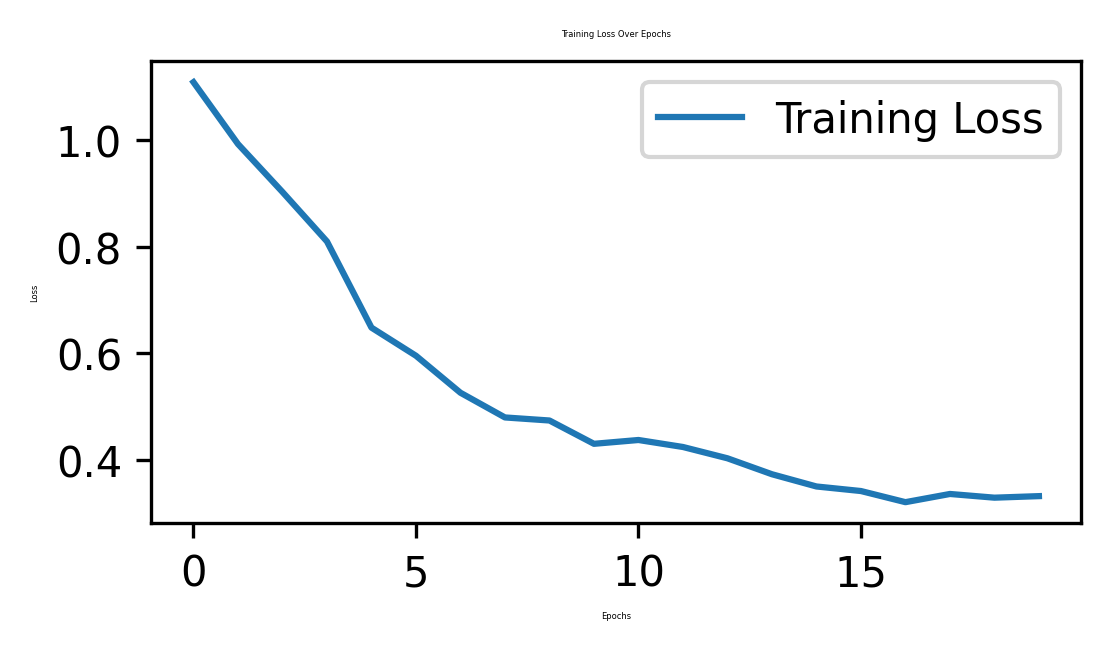

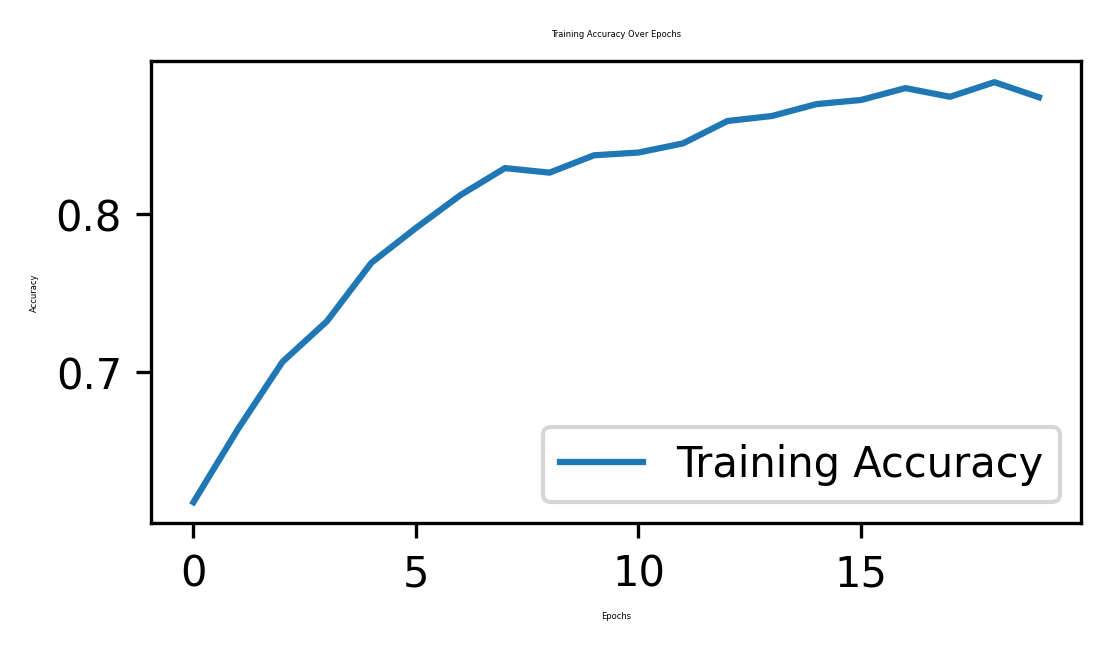

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'alexnet_history' object

# Smaller figure size and font size
small_figsize = (4, 2)
small_fontsize = 2

# Plot training loss
plt.figure(figsize=small_figsize)
plt.plot(alexnet_history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs', fontsize=small_fontsize)
plt.xlabel('Epochs', fontsize=small_fontsize)
plt.ylabel('Loss', fontsize=small_fontsize)
plt.legend()
plt.savefig('training_loss_plot.png', bbox_inches='tight', dpi=300)  # Save the plot with higher resolution
plt.show()

# Plot training accuracy
plt.figure(figsize=small_figsize)
plt.plot(alexnet_history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs', fontsize=small_fontsize)
plt.xlabel('Epochs', fontsize=small_fontsize)
plt.ylabel('Accuracy', fontsize=small_fontsize)
plt.legend()
plt.savefig('training_accuracy_plot.png', bbox_inches='tight', dpi=300)  # Save the plot with higher resolution
plt.show()




In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

# Instantiate DenseNet-121 model
densenet_model = DenseNet121(input_shape=(image_size, image_size, 3), include_top=True, weights=None, classes=num_classes)

# Compile the model (you can customize the optimizer, loss, and metrics)
densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
densenet_model.summary()

# Train the model on your training dataset using train_dataset
# validation_data can be set to validation_dataset
# Callbacks such as EarlyStopping can be used for better training control
# densenet_model.fit(train_dataset, epochs=num_epochs, validation_data=validation_dataset, callbacks=[early_stopping])


Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Assuming you have defined DATA_ROOT_DIR, TRAIN_DIR, and TEST_DIR earlier
# If not, please replace them with your actual directory paths
DATA_ROOT_DIR = "drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset"
TRAIN_DIR = os.path.join(DATA_ROOT_DIR, 'Training')
TEST_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

# Image data augmentation
image_datagen_kwargs = dict(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

train_image_datagen = ImageDataGenerator(**image_datagen_kwargs)

# Flow training images in batches using train_image_datagen generator
train_generator = train_image_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
)

# Flow test images in batches using test_image_datagen generator
test_image_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_image_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
)

# Instantiate DenseNet-121 model without top layers
base_densenet_model = DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet', pooling='avg')

# Create a new model on top of the pre-trained base_densenet_model
densenet_model = Sequential()
densenet_model.add(base_densenet_model)
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
densenet_model.add(Dropout(0.5))
densenet_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping_densenet = EarlyStopping(monitor='accuracy', patience=10)

# Define ModelCheckpoint callback to save the best model
densenet_cp_callback = ModelCheckpoint(
    filepath='densenet_best_model.keras',
    monitor='accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

# Assuming you have already defined and compiled the 'densenet_model' earlier
num_epochs_densenet = 10  # Adjust this value based on your requirements

# Train the DenseNet-121 model with EarlyStopping callback
with tf.device(gpu_device_location) if gpu_device_location else tf.device(cpu_device_location):
    densenet_history = densenet_model.fit(
        train_generator,
        epochs=num_epochs_densenet,
        callbacks=[early_stopping_densenet, densenet_cp_callback],
    )

# Evaluate the DenseNet-121 model on the test dataset
test_loss_densenet, test_accuracy_densenet = densenet_model.evaluate(test_generator)
print(f'Test Accuracy (DenseNet-121): {test_accuracy_densenet}')

Found 3466 images belonging to 4 classes.
Found 111 images belonging to 4 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/15
109/109 [==============================] - ETA: 0s - loss: 2.5996 - accuracy: 0.7198
Epoch 1: accuracy improved from -inf to 0.71985, saving model to densenet_best_model.keras
109/109 [==============================] - 177s 979ms/step - loss: 2.5996 - accuracy: 0.7198
Epoch 2/15
109/109 [==============================] - ETA: 0s - loss: 1.0945 - accuracy: 0.8719
Epoch 2: accuracy improved from 0.71985 to 0.87190, saving model to densenet_best_model.keras
109/109 [==============================] - 103s 946ms/step - loss: 1.0945 - accuracy: 0.8719
Epoch 3/15
109/109 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.8970
Epoch 3: accuracy improved from 0.87190 to 0.89700, saving model to densenet_best_model.keras
109/109 [==============================] - 104s 956ms/step - loss: 0.6844 - accuracy: 0.8970
Epoch 

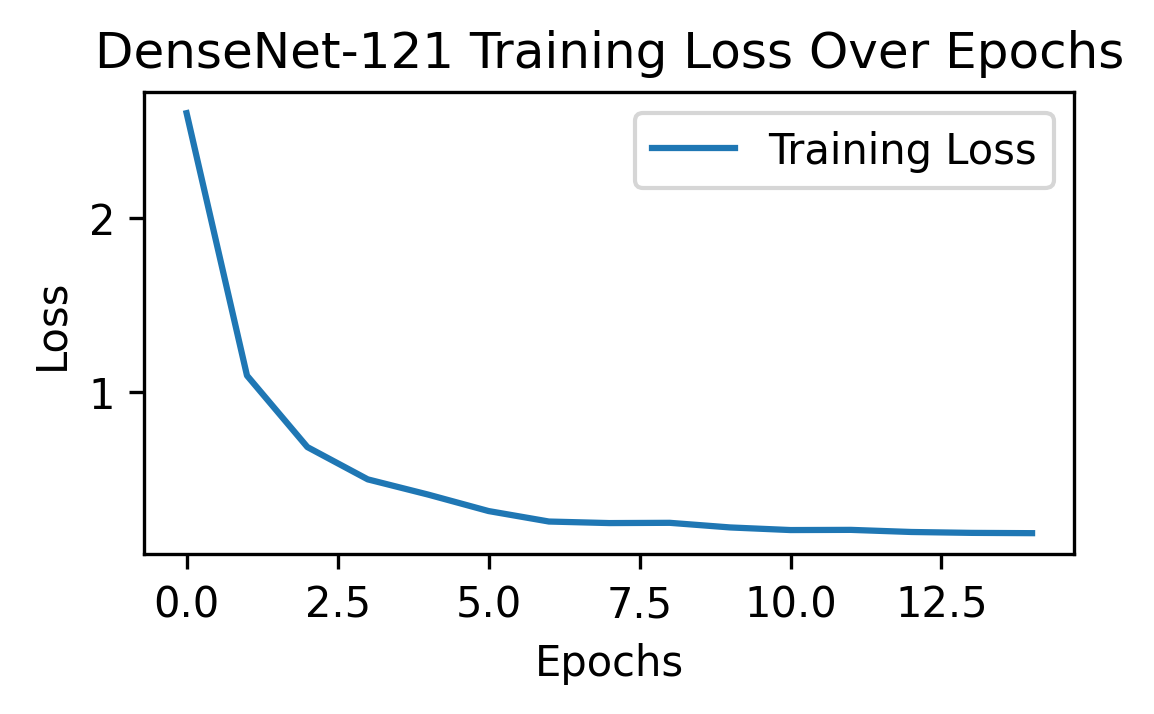

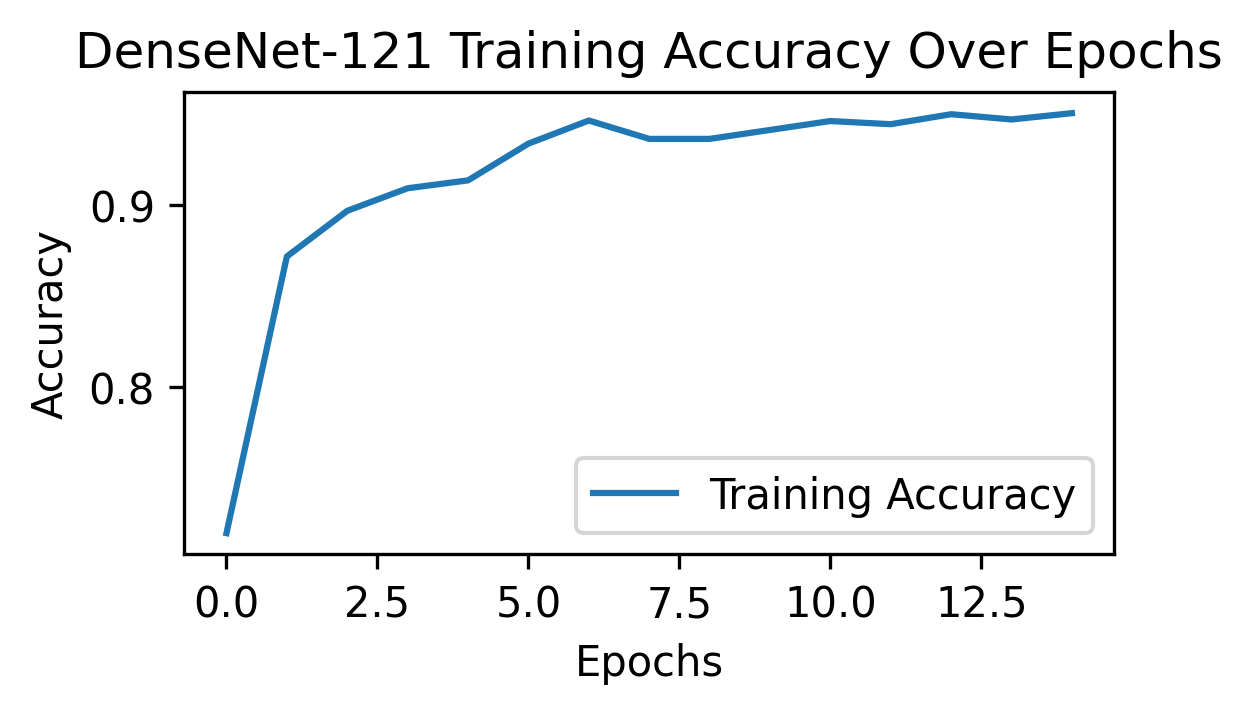

In [ ]:
import matplotlib.pyplot as plt
# Plot training loss
plt.figure(figsize=(4, 2))
plt.plot(densenet_history.history['loss'], label='Training Loss')
plt.title('DenseNet-121 Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.figure(figsize=(4, 2))
plt.plot(densenet_history.history['accuracy'], label='Training Accuracy')
plt.title('DenseNet-121 Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
pip install seaborn

1/1 [==============================] - 0s 210ms/step


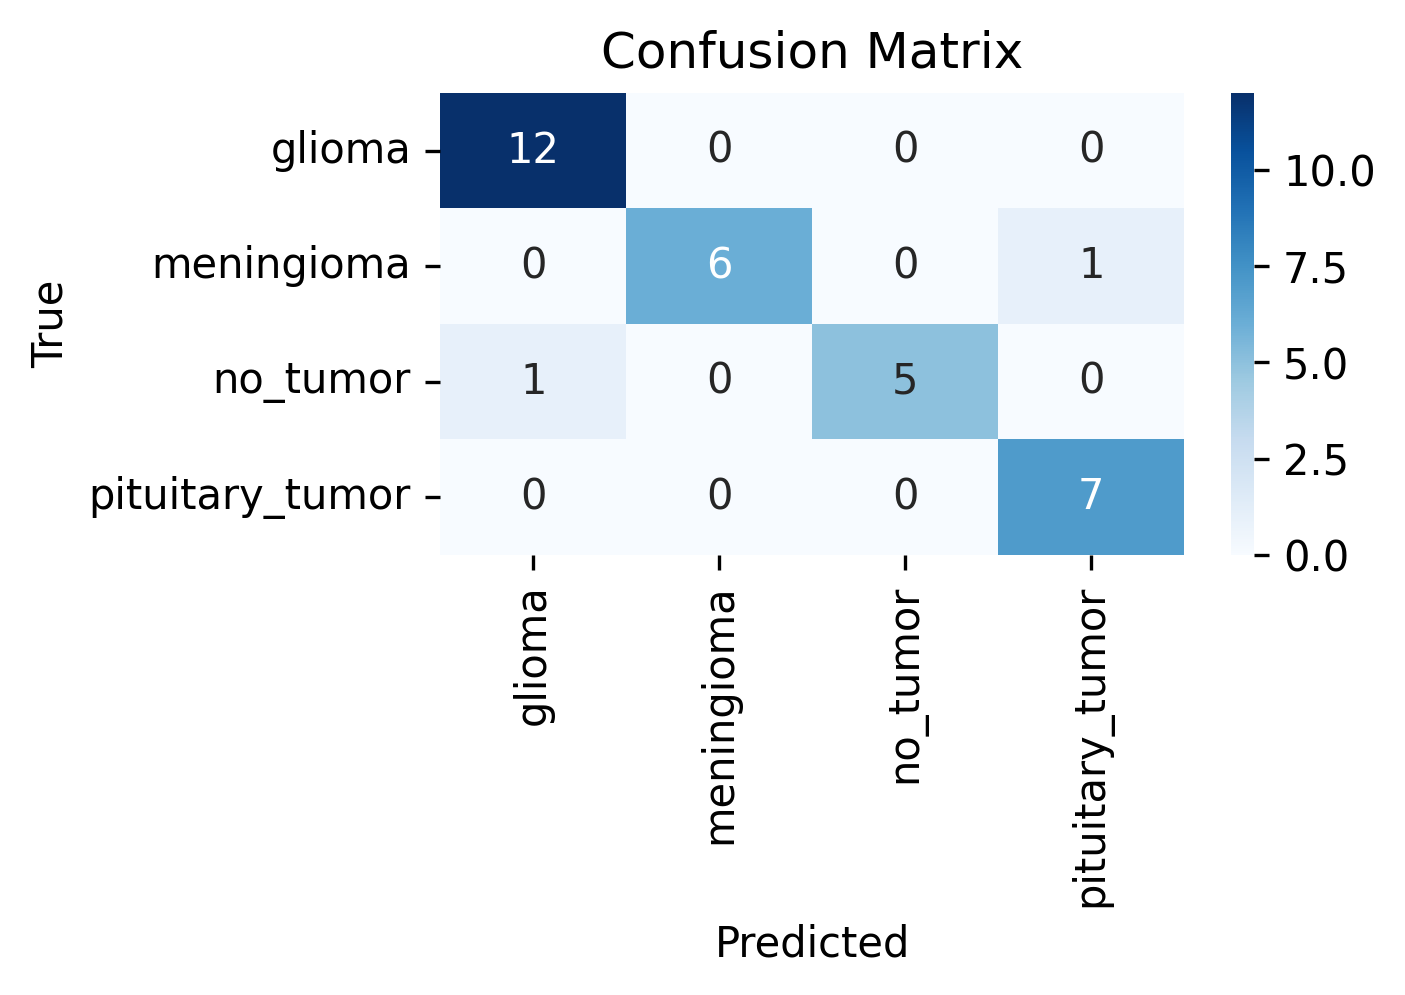

1/1 [==============================] - 3s 3s/step


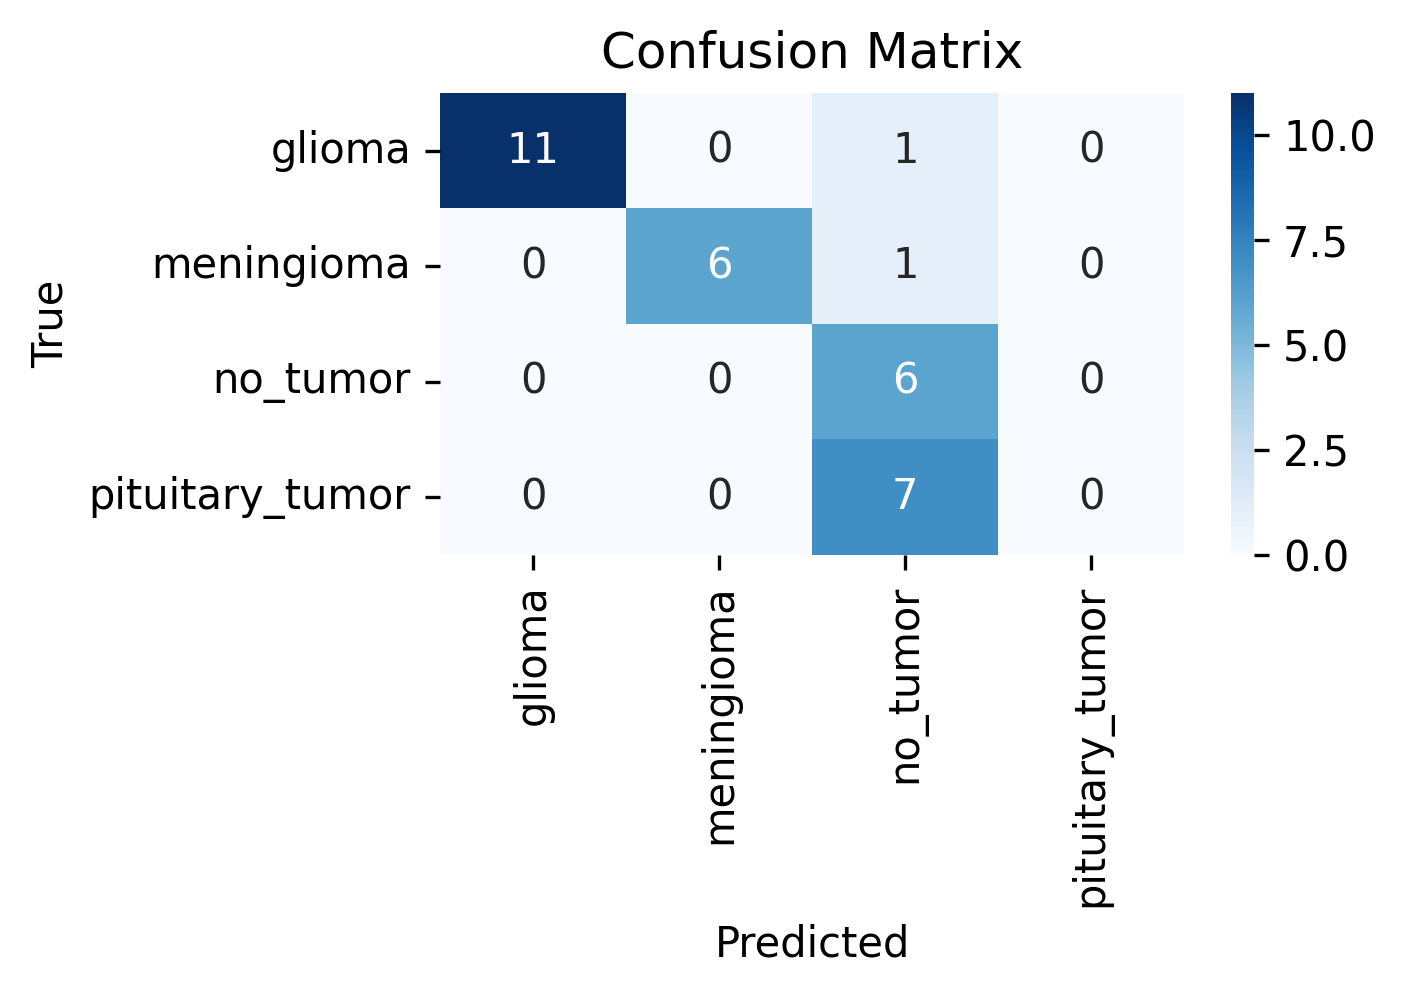

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Assuming you have test data and labels
# Replace these with the actual data from your test_generator
test_data, test_labels = next(test_generator)

# Predictions for AlexNet
alexnet_predictions = alexnet_model.predict(test_data)
alexnet_predicted_classes = np.argmax(alexnet_predictions, axis=1)
alexnet_true_classes = np.argmax(test_labels, axis=1)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Plot confusion matrix for AlexNet
plot_confusion_matrix(alexnet_true_classes, alexnet_predicted_classes, class_names)

# Predictions for DenseNet-121
densenet_predictions = densenet_model.predict(test_data)
densenet_predicted_classes = np.argmax(densenet_predictions, axis=1)
densenet_true_classes = np.argmax(test_labels, axis=1)

# Plot confusion matrix for DenseNet-121
plot_confusion_matrix(densenet_true_classes, densenet_predicted_classes, class_names)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, f1_score
import numpy as np

# Assuming you have test data and labels
# Replace these with the actual data from your test_generator
test_data, test_labels = next(test_generator)

# Predictions for AlexNet
alexnet_predictions = alexnet_model.predict(test_data)
alexnet_predicted_classes = np.argmax(alexnet_predictions, axis=1)
alexnet_true_classes = np.argmax(test_labels, axis=1)

# Calculate MAE, MSE, RMSE, Loss, Accuracy, F1-Score for AlexNet
alexnet_mae = mean_absolute_error(alexnet_true_classes, alexnet_predicted_classes)
alexnet_mse = mean_squared_error(alexnet_true_classes, alexnet_predicted_classes)
alexnet_rmse = np.sqrt(alexnet_mse)
alexnet_loss, alexnet_accuracy = alexnet_model.evaluate(test_data, test_labels)
alexnet_f1_score = f1_score(alexnet_true_classes, alexnet_predicted_classes, average='weighted')

print("AlexNet Metrics:")
print(f"MAE: {alexnet_mae}")
print(f"MSE: {alexnet_mse}")
print(f"RMSE: {alexnet_rmse}")
print(f"Loss: {alexnet_loss}")
print(f"Accuracy: {alexnet_accuracy}")
print(f"F1-Score: {alexnet_f1_score}")

# Predictions for DenseNet-121
densenet_predictions = densenet_model.predict(test_data)
densenet_predicted_classes = np.argmax(densenet_predictions, axis=1)
densenet_true_classes = np.argmax(test_labels, axis=1)

# Calculate MAE, MSE, RMSE, Loss, Accuracy, F1-Score for DenseNet-121
densenet_mae = mean_absolute_error(densenet_true_classes, densenet_predicted_classes)
densenet_mse = mean_squared_error(densenet_true_classes, densenet_predicted_classes)
densenet_rmse = np.sqrt(densenet_mse)
densenet_loss, densenet_accuracy = densenet_model.evaluate(test_data, test_labels)
densenet_f1_score = f1_score(densenet_true_classes, densenet_predicted_classes, average='weighted')

print("\nDenseNet-121 Metrics:")
print(f"MAE: {densenet_mae}")
print(f"MSE: {densenet_mse}")
print(f"RMSE: {densenet_rmse}")
print(f"Loss: {densenet_loss}")
print(f"Accuracy: {densenet_accuracy}")
print(f"F1-Score: {densenet_f1_score}")


1/1 [==============================] - 0s 50ms/step - loss: 0.1405 - accuracy: 0.9062
AlexNet Metrics:
MAE: 0.21875
MSE: 0.59375
RMSE: 0.770551750371122
Loss: 0.14048349857330322
Accuracy: 0.90625
F1-Score: 0.8942882775119617
1/1 [==============================] - 0s 141ms/step - loss: 3.0480 - accuracy: 0.5938

DenseNet-121 Metrics:
MAE: 0.4375
MSE: 0.5
RMSE: 0.7071067811865476
Loss: 3.047959804534912
Accuracy: 0.59375
F1-Score: 0.5656986531986532


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential

# Define directories
DATA_ROOT_DIR = "drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset"
TRAIN_DIR = os.path.join(DATA_ROOT_DIR, 'Training')
TEST_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

# Image data augmentation parameters
image_datagen_kwargs = dict(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

# Define batch size
batch_size = 32

# Create data generator for testing
test_image_datagen = ImageDataGenerator(**image_datagen_kwargs)

# Flow test images in batches using test_image_datagen generator
test_generator = test_image_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),  # Resize images to match the input size of AlexNet and DenseNet-121
    batch_size=batch_size,
    class_mode='categorical',
)

# Load pre-trained DenseNet121 model
densenet_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')

# Define AlexNet model (assuming you have defined it previously)
alexnet_model = create_alexnet(input_shape=(224, 224, 3), num_classes=4)  # Adjust num_classes as needed

# Initialize empty lists to store features and labels for both models
alexnet_features_list = []
densenet_features_list = []
test_labels_list = []

# Loop through the test data generator
for i in range(len(test_generator)):
    # Get batch of test data and labels
    test_data_batch, test_labels_batch = next(test_generator)

    # Extract features using the AlexNet model
    alexnet_batch_features = alexnet_model.predict(test_data_batch)
    alexnet_features_list.append(alexnet_batch_features)

    # Extract features using the DenseNet121 model
    densenet_batch_features = densenet_model.predict(test_data_batch)
    densenet_features_list.append(densenet_batch_features)

    # Append batch labels to the list
    test_labels_list.append(test_labels_batch)

# Concatenate the features and labels along the batch axis for both models
alexnet_features = np.concatenate(alexnet_features_list, axis=0)
densenet_features = np.concatenate(densenet_features_list, axis=0)
test_labels = np.concatenate(test_labels_list, axis=0)

# Print shapes of extracted features and labels for both models
print("AlexNet features shape:", alexnet_features.shape)
print("DenseNet-121 features shape:", densenet_features.shape)
print("Test labels shape:", test_labels.shape)

Found 111 images belonging to 4 classes.
1/1 [==============================] - 2s 2s/step
AlexNet features shape: (111, 4)
DenseNet-121 features shape: (111, 1024)
Test labels shape: (111, 4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from joblib import Parallel, delayed
import numpy as np
from PIL import Image
import glob
import os
import joblib



# Function to preprocess and resize images
def preprocess_image(img_path):
    img = np.array(Image.open(img_path))
    img_resized = resize(img, (224, 224))
    return img_resized

# Define directories
DATA_ROOT_DIR = "drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset"
TEST_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

# Load and preprocess images in parallel
selected_image_filepaths = glob.glob(os.path.join(TEST_DIR, '*', '*.jpg'))
num_cores = os.cpu_count()
resized_images = Parallel(n_jobs=num_cores)(delayed(preprocess_image)(img) for img in selected_image_filepaths)

# Convert resized images to numpy array
processed_test_data = np.stack(resized_images)

# Extract features from the test data using AlexNet and DenseNet-121
alexnet_features_test = alexnet_model.predict(processed_test_data)
densenet_features_test = densenet_model.predict(processed_test_data)

# Concatenate the features
concatenated_features_test = np.concatenate([alexnet_features_test, densenet_features_test], axis=-1)

# Map tumor class names to numerical labels
class_mapping = {'meningioma': 0, 'glioma': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
test_labels_mapped = np.array([class_mapping[label.split('/')[-2]] for label in selected_image_filepaths])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(concatenated_features_test, test_labels_mapped, test_size=0.2, random_state=42)

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Save the trained Random Forest model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')

# Make predictions on the test set
predictions = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy}')


4/4 [==============================] - 0s 97ms/step
Test Accuracy: 0.9130434782608695


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
import glob
from skimage.transform import resize

# Define directories
DATA_ROOT_DIR = "drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset"
TRAIN_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')
PREDICTION_DIR = os.path.join(DATA_ROOT_DIR, 'prediction')

# Function to preprocess and resize images
def preprocess_image(img_path):
    img = np.array(Image.open(img_path))
    img_resized = resize(img, (224, 224))  # Resize images to match the input size of the model
    return img_resized

# Load and preprocess images from both training and prediction directories
selected_image_filepaths_train = glob.glob(os.path.join(TRAIN_DIR, '*', '*.jpg'))
selected_image_filepaths_pred = glob.glob(os.path.join(PREDICTION_DIR, '*.jpg'))

# Combine image filepaths
selected_image_filepaths_combined = selected_image_filepaths_train + selected_image_filepaths_pred

# Preprocess images
resized_images = [preprocess_image(img_path) for img_path in selected_image_filepaths_combined]
processed_data = np.stack(resized_images)

# Map tumor class names to numerical labels for training data
class_mapping_train = {'meningioma': 0, 'glioma': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
train_labels_mapped = np.array([class_mapping_train[os.path.basename(os.path.dirname(label))] for label in selected_image_filepaths_train])

# Split the combined dataset into training and prediction sets
X_train, X_pred = processed_data[:len(selected_image_filepaths_train)], processed_data[len(selected_image_filepaths_train):]

# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train.reshape(X_train.shape[0], -1), train_labels_mapped)

# Predict tumor class for images in the prediction directory
predictions = random_forest_model.predict(X_pred.reshape(X_pred.shape[0], -1))

# Print predictions for each image in the prediction directory
for image_path, prediction in zip(selected_image_filepaths_pred, predictions):
    print(f'Image: {image_path}, Predicted Tumor Class: {prediction}')




Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Te-me_0115.jpg, Predicted Tumor Class: 0
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Copy of N30.jpg, Predicted Tumor Class: 2
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Copy of N28.jpg, Predicted Tumor Class: 3
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Copy of N29.jpg, Predicted Tumor Class: 2
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Copy of P29.jpg, Predicted Tumor Class: 2
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Copy of P28.jpg, Predicted Tumor Class: 2
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/Copy of P30.jpg, Predicted Tumor Class: 2
Image: drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset/prediction/GT30.jpg, Predicted Tumor Class: 1
Image: drive/MyDrive/Dee

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
import glob
from skimage.transform import resize
import matplotlib.pyplot as plt

# Define directories
DATA_ROOT_DIR = "drive/MyDrive/Deep_Learning_Course_Project/Brain-Tumor-Dataset"
TRAIN_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')
PREDICTION_DIR = os.path.join(DATA_ROOT_DIR, 'prediction')

# Function to preprocess and resize images
def preprocess_image(img_path):
    img = np.array(Image.open(img_path))
    img_resized = resize(img, (224, 224))  # Resize images to match the input size of the model
    return img_resized

# Load and preprocess images from both training and prediction directories
selected_image_filepaths_train = glob.glob(os.path.join(TRAIN_DIR, '*', '*.jpg'))
selected_image_filepaths_pred = glob.glob(os.path.join(PREDICTION_DIR, '*.jpg'))

# Combine image filepaths
selected_image_filepaths_combined = selected_image_filepaths_train + selected_image_filepaths_pred

# Preprocess images
resized_images = [preprocess_image(img_path) for img_path in selected_image_filepaths_combined]
processed_data = np.stack(resized_images)

# Map tumor class names to numerical labels for training data
class_mapping_train = {'meningioma': 0, 'glioma': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
train_labels_mapped = np.array([class_mapping_train[os.path.basename(os.path.dirname(label))] for label in selected_image_filepaths_train])

# Split the combined dataset into training and prediction sets
X_train, X_pred = processed_data[:len(selected_image_filepaths_train)], processed_data[len(selected_image_filepaths_train):]

# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train.reshape(X_train.shape[0], -1), train_labels_mapped)

# Predict tumor class for images in the prediction directory
predictions = random_forest_model.predict(X_pred.reshape(X_pred.shape[0], -1))

# Display images with predicted tumor class
for image_path, prediction in zip(selected_image_filepaths_pred, predictions):
    # Load image
    image = Image.open(image_path)

    # Display image with predicted tumor class
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(f'Predicted Tumor Class: {prediction}')
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

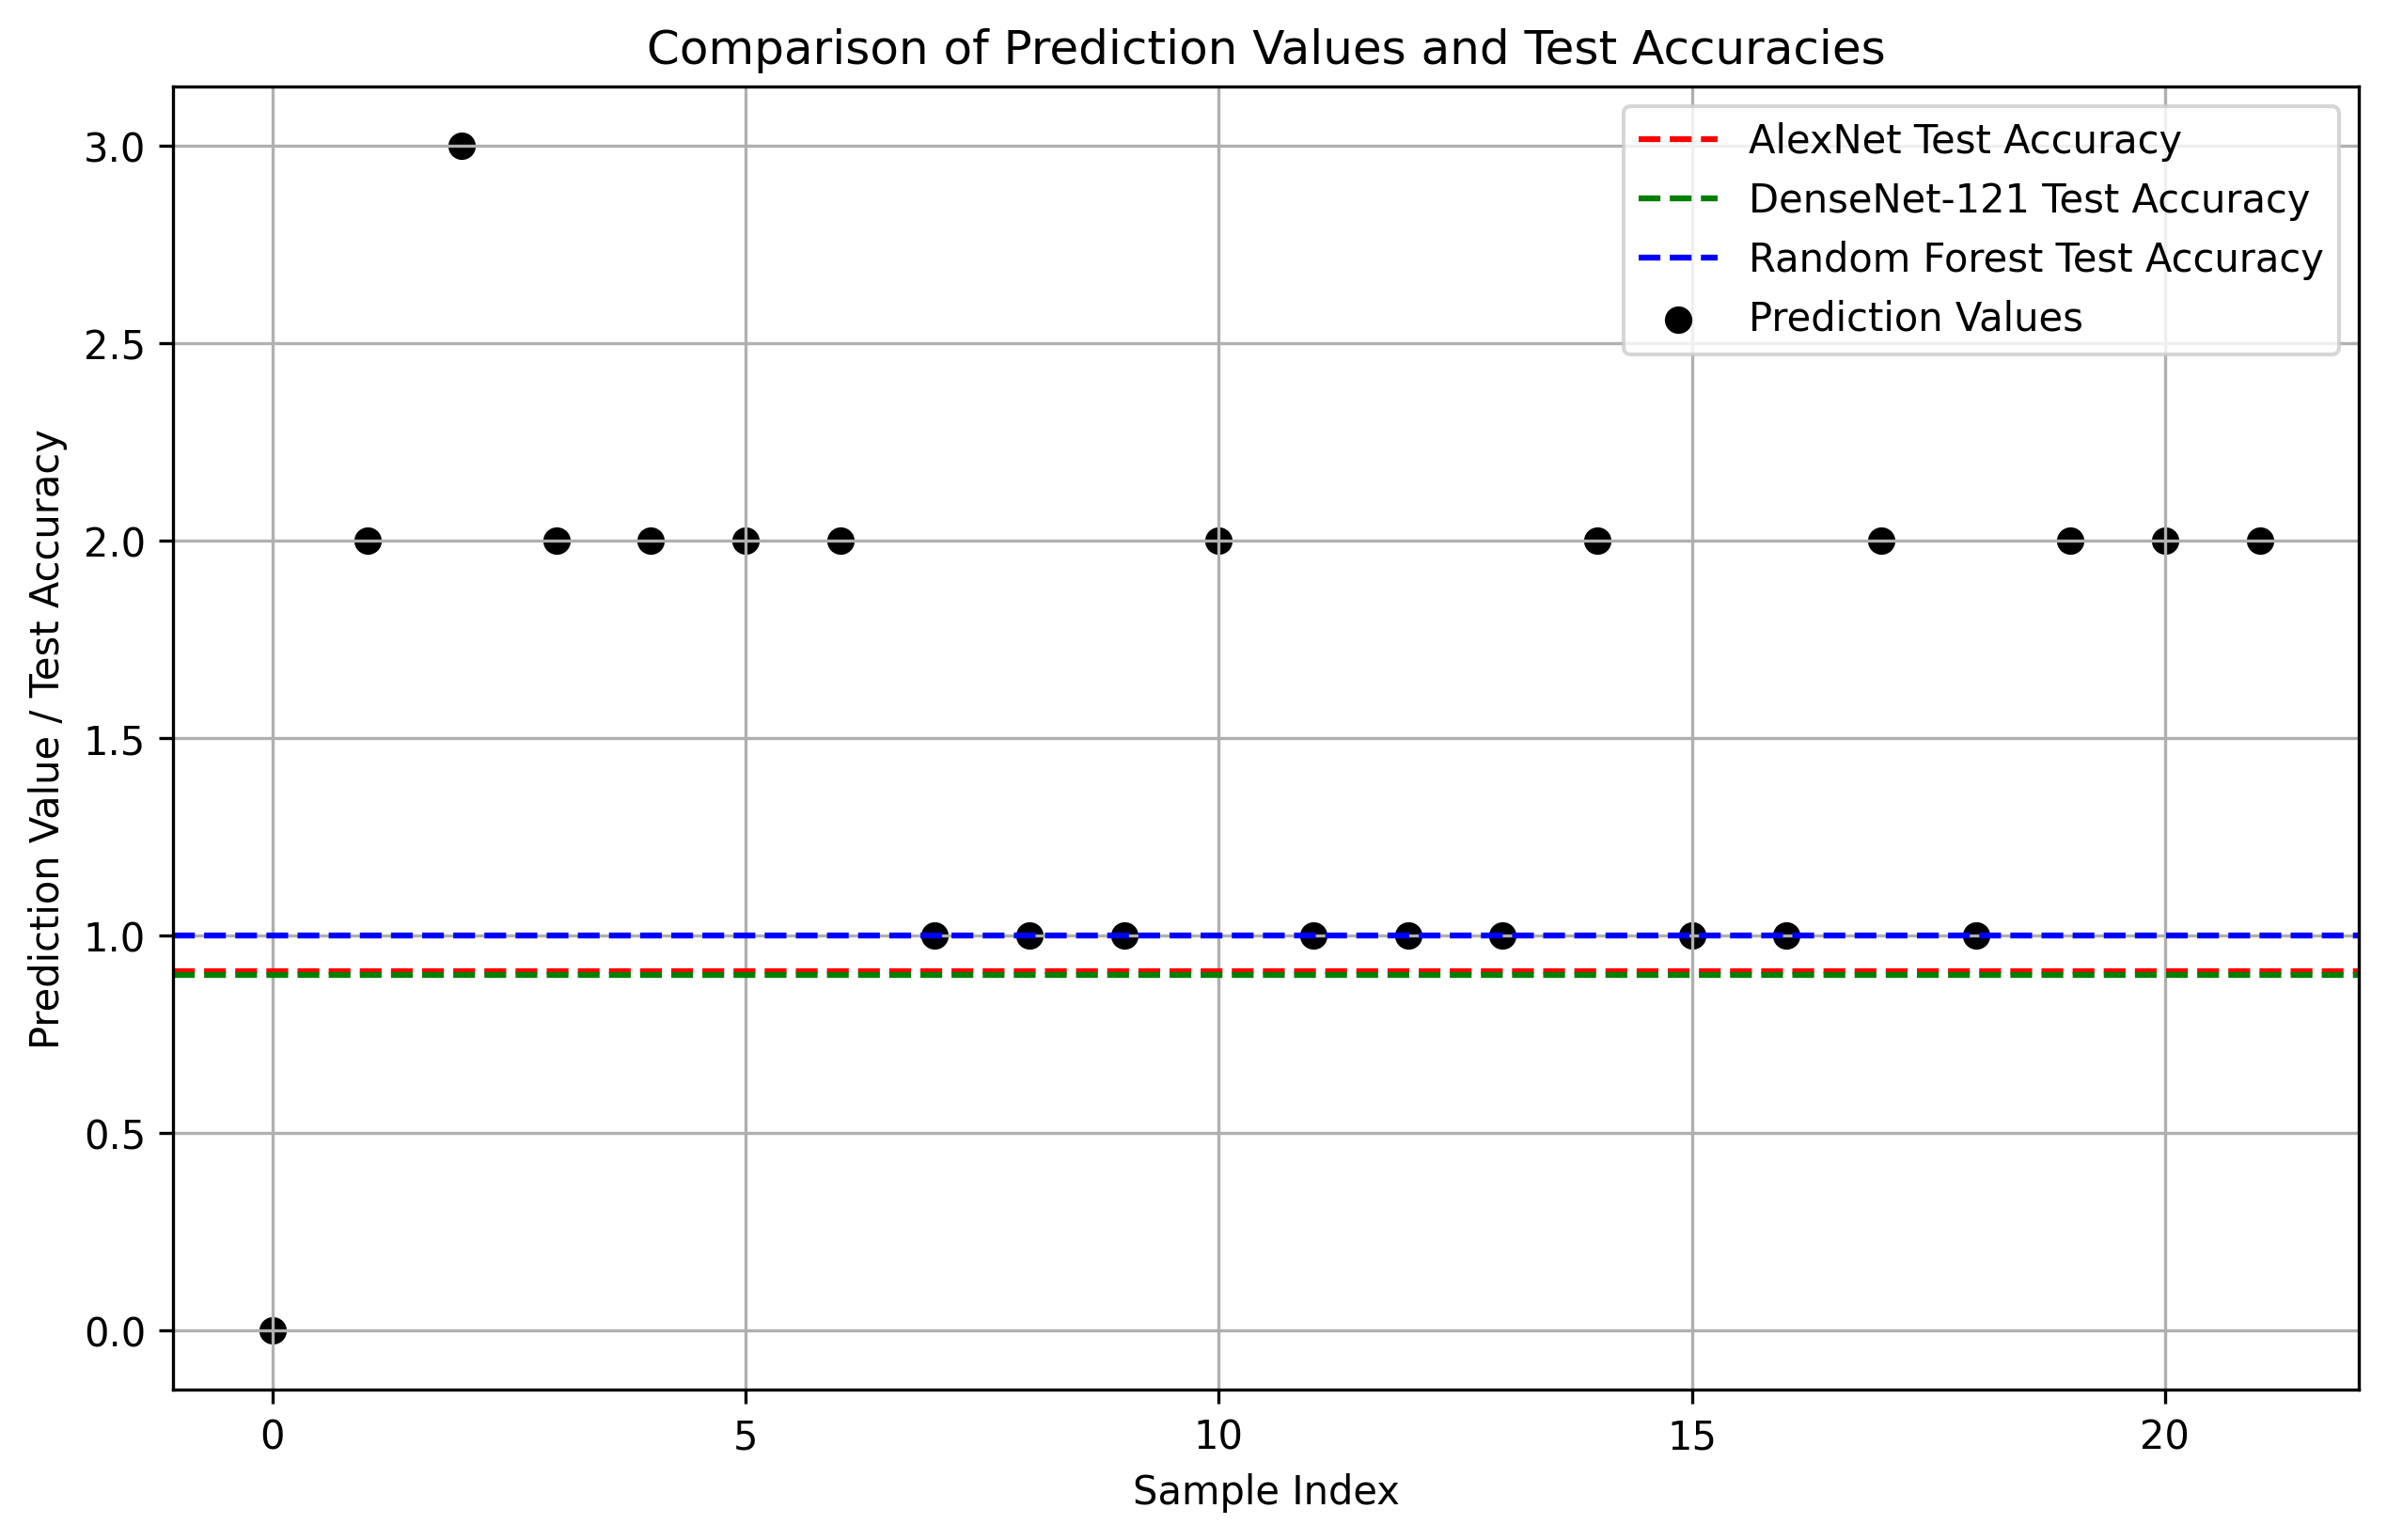

In [ ]:
import matplotlib.pyplot as plt

# Test accuracy results
alexnet = alexnet_accuracy  # Replace with actual test accuracy of AlexNet
densenet =  densenet_accuracy # Replace with actual test accuracy of DenseNet-121
random_forest_accuracy = accuracy  # Use the accuracy variable from the previous code

# Prediction values
prediction_values = predictions  # Use the predicted values from the previous code

# Plotting
plt.figure(figsize=(10, 6))

# Plot test accuracy results
plt.axhline(y=alexnet, color='r', linestyle='--', label='AlexNet Test Accuracy')
plt.axhline(y=densenet, color='g', linestyle='--', label='DenseNet-121 Test Accuracy')
plt.axhline(y=random_forest_accuracy, color='b', linestyle='--', label='Random Forest Test Accuracy')

# Plot prediction values
plt.scatter(range(len(prediction_values)), prediction_values, color='black', label='Prediction Values')

plt.title('Comparison of Prediction Values and Test Accuracies')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value / Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


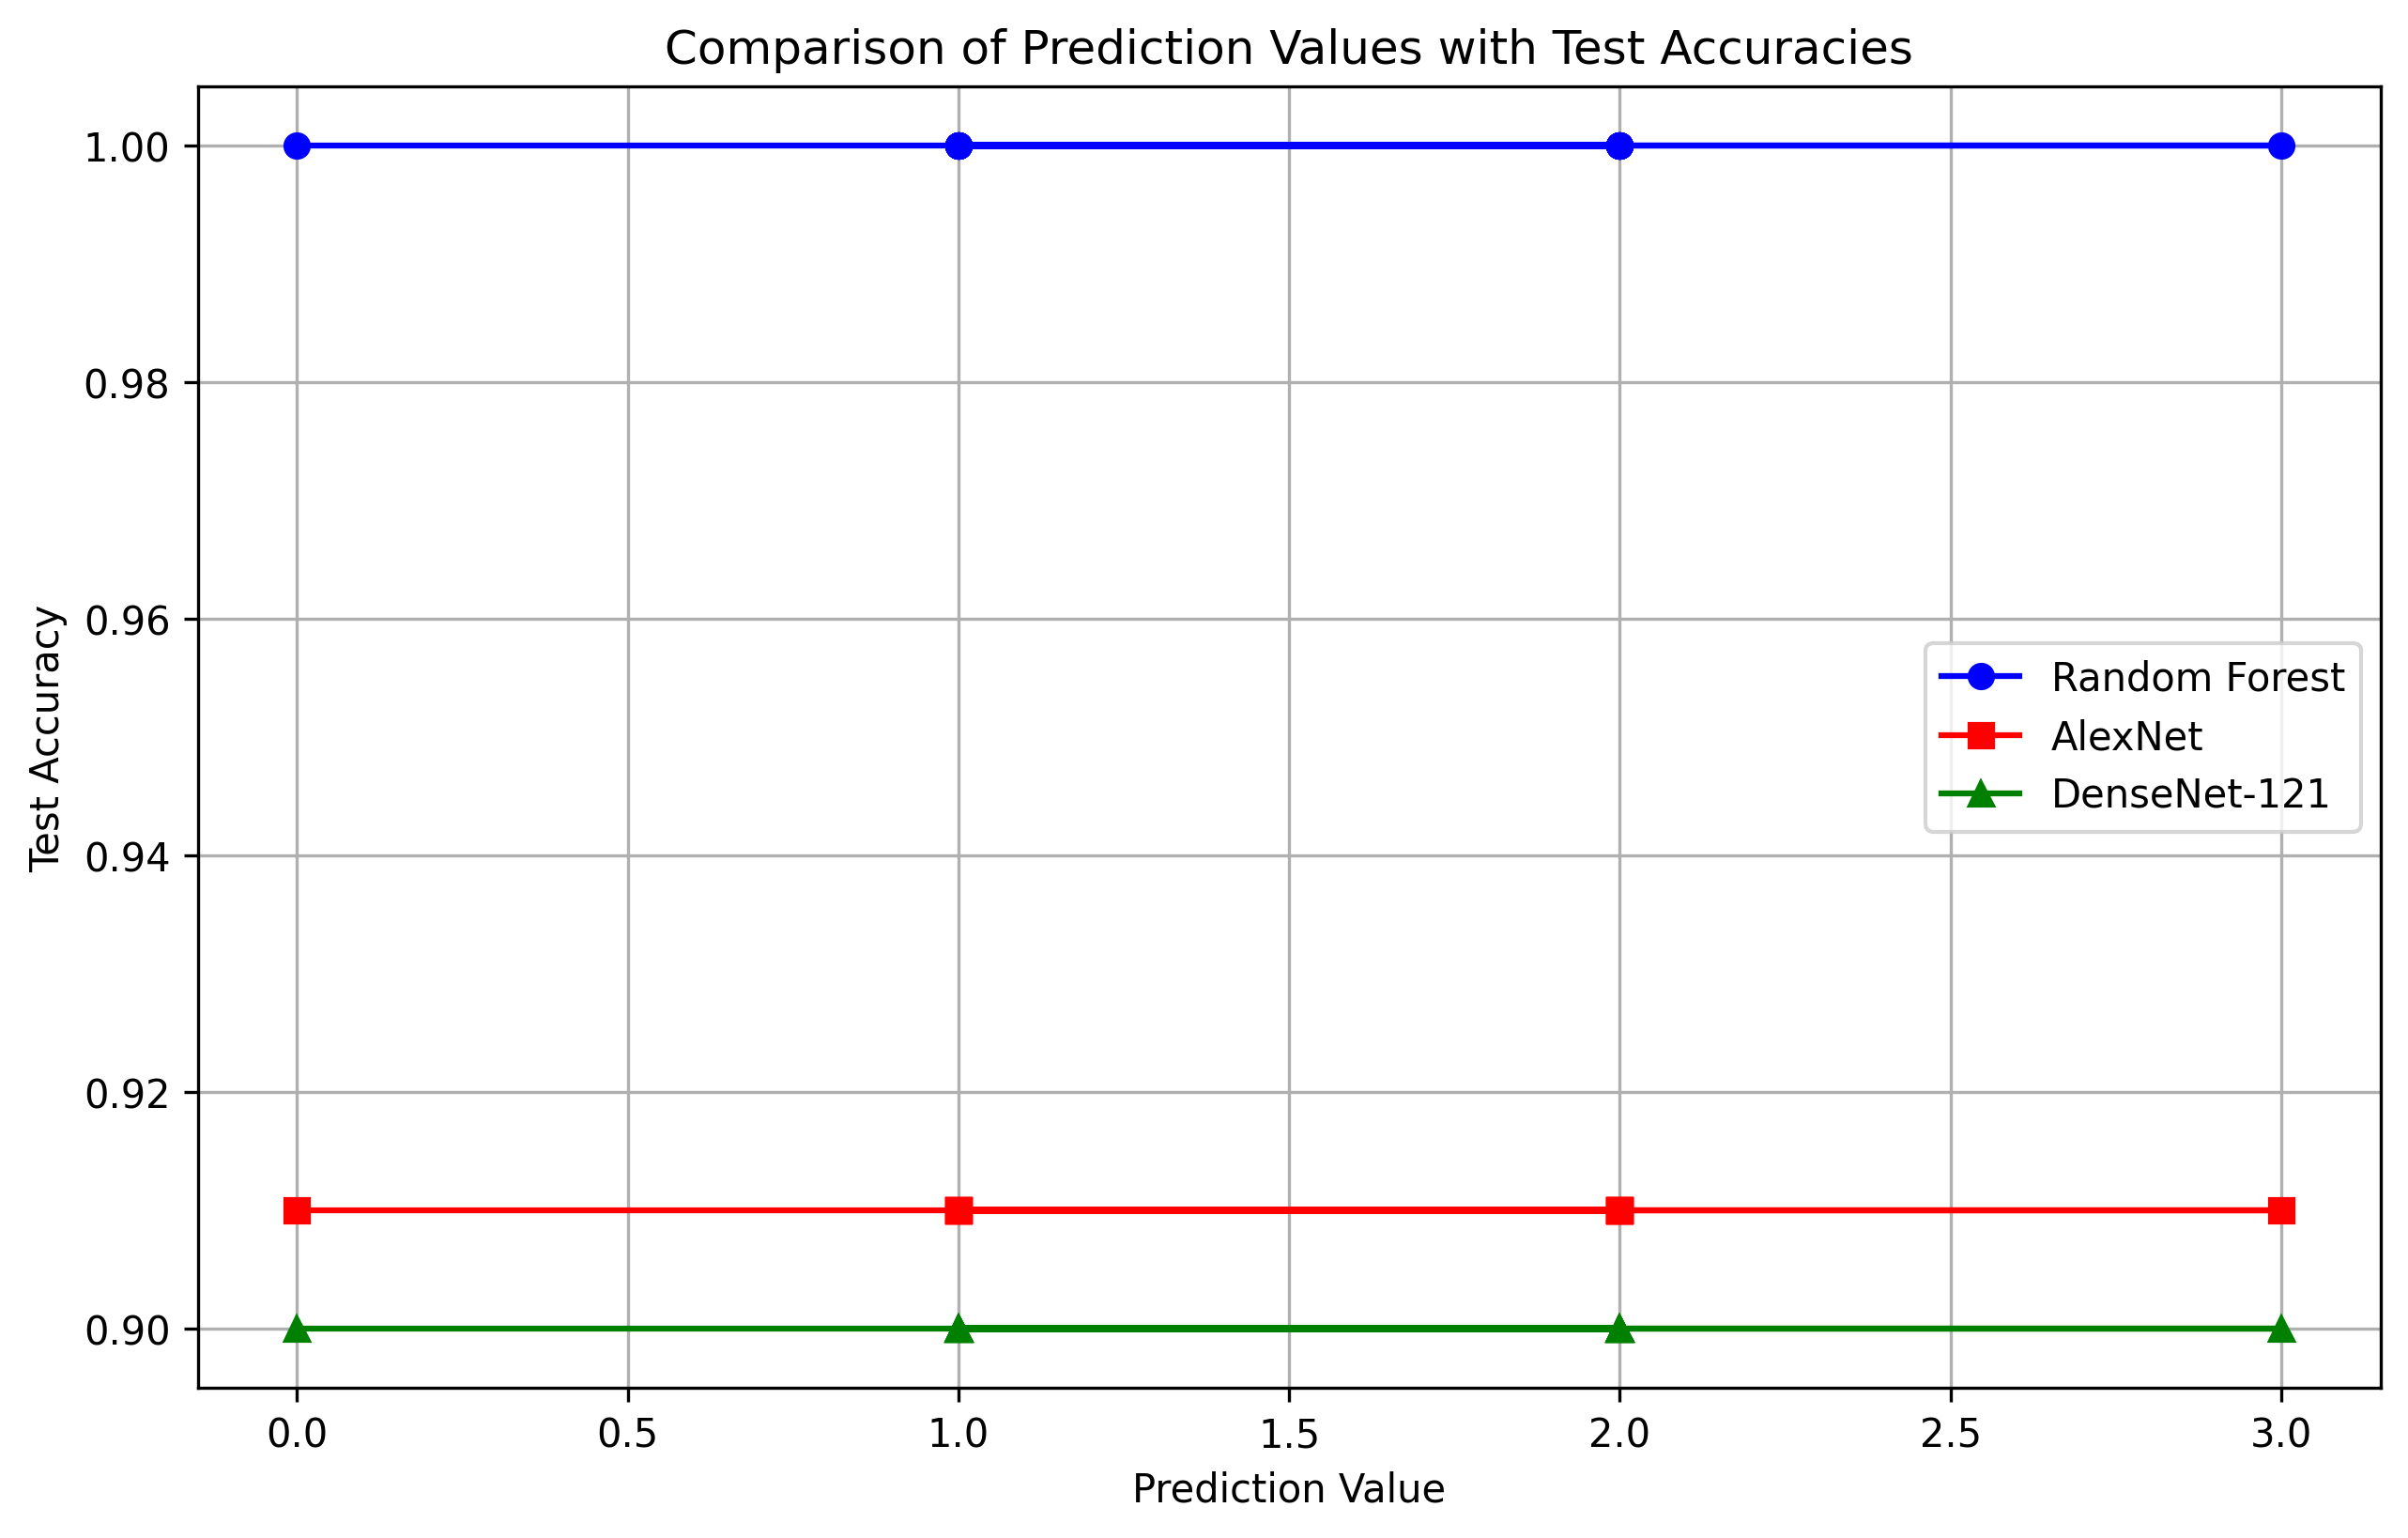

In [ ]:
import matplotlib.pyplot as plt

# Test accuracy results
alexnet = alexnet_accuracy  # Replace with actual test accuracy of AlexNet
densenet = densenet_accuracy  # Replace with actual test accuracy of DenseNet-121
random_forest_accuracy = accuracy  # Use the accuracy variable from the previous code

# Prediction values
prediction_values = predictions  # Use the predicted values from the previous code

# Plotting
plt.figure(figsize=(10, 6))

# Plot prediction values vs. accuracy
plt.plot(prediction_values, [random_forest_accuracy]*len(prediction_values), marker='o', linestyle='-', color='b', label='Random Forest')
plt.plot(prediction_values, [alexnet]*len(prediction_values), marker='s', linestyle='-', color='r', label='AlexNet')
plt.plot(prediction_values, [densenet]*len(prediction_values), marker='^', linestyle='-', color='g', label='DenseNet-121')

plt.title('Comparison of Prediction Values with Test Accuracies')
plt.xlabel('Prediction Value')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

